In [23]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
import pandas as pd
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier


In [33]:
# import some data to play with
iris = datasets.load_iris()
X = pd.DataFrame(iris.data[:, :4])  
X.columns = iris['feature_names']
y = iris.target


In [34]:
#clean feature_names
fs = iris['feature_names']
cf = []
for f in fs:
    cf.append( f.replace(' (cm)','').replace(' ', '_'))
X.columns = cf

In [35]:
y_names = list(iris.target_names[k] for k in y)

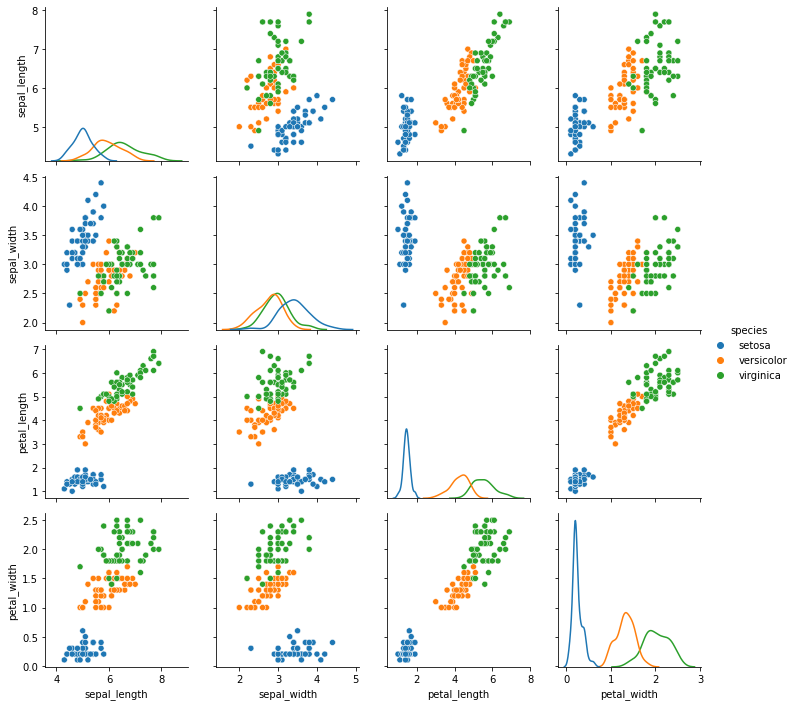

In [36]:
plot_data = X
plot_data['species'] = y_names
g = sns.PairGrid(plot_data, hue='species')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()


In [19]:
data = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    data['data'], data['target'], test_size=.2)

# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2,
                    learning_rate=1, objective='binary:logistic')

# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test);

print(mt.confusion_matrix(y_test, preds))


[15:30:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[12  0  0]
 [ 0  6  1]
 [ 0  0 11]]


/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [51]:

bst = XGBClassifier(n_estimators=2, max_depth=2,
                    learning_rate=0.1, objective='binary:logistic')

# fit model
# training data
source = X[(X.species.isin(['setosa', 'versicolor']))]
X_train = source.drop('species', axis=1, inplace=False)
y = source['species']

# testing data

target = X[(X.species == 'virginica')]

X_target = target.drop('species', axis=1, inplace=False)
y = target['species']

bst.fit(X_train, y_train)
# make predictions
preds=bst.predict(X_target);

print(mt.confusion_matrix(y, preds))


/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBoostError: [15:59:49] ../src/data/data.cc:592: Check failed: labels_.Size() == num_row_ (120 vs. 100) : Size of labels must equal to number of rows.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000011af03a54 dmlc::LogMessageFatal::~LogMessageFatal() + 116
  [bt] (1) 2   libxgboost.dylib                    0x000000011af61708 xgboost::MetaInfo::Validate(int) const + 1480
  [bt] (2) 3   libxgboost.dylib                    0x000000011afc4c3a xgboost::LearnerImpl::ValidateDMatrix(xgboost::DMatrix*, bool) const + 58
  [bt] (3) 4   libxgboost.dylib                    0x000000011afb3dc6 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 326
  [bt] (4) 5   libxgboost.dylib                    0x000000011af07f47 XGBoosterUpdateOneIter + 151
  [bt] (5) 6   libffi.7.dylib                      0x0000000106770ead ffi_call_unix64 + 85
  [bt] (6) 7   ???                                 0x00007ff7b9cc9df0 0x0 + 140701950844400

